プログラミング言語やJupyter Notebookを利用することで、
分析レポートの作成が容易になります。ここでは独立行政法人 統計センターが公開している教育用標準データセット (SSDSE)を用いて、統計データの分析を行います。

ウェブブラウザから次のリンクにアクセスします。
<https://www.nstac.go.jp/use/literacy/ssdse/>

## データのダウンロード

SSDSEにはいくつかのデータの種類（AからE）がありますが、ここでは、`SSDSE-県別推移`(SSDSE-B-2023)を用います。Excel形式、csv形式の2つのファイル形式でのダウンロードが可能ですが、**csv形式のファイルをダウンロード**します。

自身の端末にファイルをダウンロードしたら、JupyterHubへもアップロードしておきましょう。

## データの読み込み

分析を始める前に、必要なパッケージとデータを読み込みます。
次のコードを実行して、準備を整えましょう。


In [1]:
# 日本語の都道府県名をローマ字表記に変換するために利用する
install.packages("zipangu")
# データ読み込み、操作、可視化などの機能を提供するパッケージ
library(tidyverse)


The downloaded binary packages are in
	/var/folders/bz/w2gy6fh13x7_7y6xlympr0xc0000gn/T//Rtmp47JOVj/downloaded_packages


── Attaching core tidyverse packages ──────────────────────── tidyverse 2.0.0 ──
✔ dplyr     1.1.4     ✔ readr     2.1.5
✔ forcats   1.0.0     ✔ stringr   1.5.1
✔ ggplot2   3.4.4     ✔ tibble    3.2.1
✔ lubridate 1.9.3     ✔ tidyr     1.3.0
✔ purrr     1.0.2     


── Conflicts ────────────────────────────────────────── tidyverse_conflicts() ──
✖ dplyr::filter() masks stats::filter()
✖ dplyr::lag()    masks stats::lag()
ℹ Use the conflicted package (<http://conflicted.r-lib.org/>) to force all conflicts to become errors


In [2]:
# df という名前のオブジェクトにデータを格納します。
# dfは表形式のデータを表す data frame の略称です。
df <- 
  # ファイル名を変更して保存した場合、`SSDSE-B-2023.csv`の部分を変更してください。
  read_csv("SSDSE-B-2023.csv",
           locale = locale(encoding = "CP932"))

Rows: 565 Columns: 112


── Column specification ────────────────────────────────────────────────────────
Delimiter: ","
chr (112): SSDSE-B-2023, Code, Prefecture, A1101, A110101, A110102, A1102, A...



ℹ Use `spec()` to retrieve the full column specification for this data.
ℹ Specify the column types or set `show_col_types = FALSE` to quiet this message.


読み込んだデータを出力してみましょう。いくつかの出力方法が利用できます。


In [3]:
df

head(df)

glimpse(df)

SSDSE-B-2023,Code,Prefecture,A1101,A110101,A110102,A1102,A110201,A110202,A1301,⋯,L322101,L322102,L322103,L322104,L322105,L322106,L322107,L322108,L322109,L322110
<chr>,<chr>,<chr>,<chr>,<chr>,<chr>,<chr>,<chr>,<chr>,<chr>,⋯,<chr>,<chr>,<chr>,<chr>,<chr>,<chr>,<chr>,<chr>,<chr>,<chr>
年度,地域コード,都道府県,総人口,総人口（男）,総人口（女）,日本人人口,日本人人口（男）,日本人人口（女）,15歳未満人口,⋯,食料費（二人以上の世帯）,住居費（二人以上の世帯）,光熱・水道費（二人以上の世帯）,家具・家事用品費（二人以上の世帯）,被服及び履物費（二人以上の世帯）,保健医療費（二人以上の世帯）,交通・通信費（二人以上の世帯）,教育費（二人以上の世帯）,教養娯楽費（二人以上の世帯）,その他の消費支出（二人以上の世帯）
2020,R01000,北海道,5224614,2465088,2759526,5151366,2429697,2721669,555804,⋯,77680,27305,27309,12255,9227,14251,41407,9394,26539,56316
2019,R01000,北海道,5259000,2480000,2780000,5223000,2464000,2759000,565000,⋯,72912,20862,26332,9895,10466,16466,42277,8848,29335,57289
2018,R01000,北海道,5293000,2495000,2798000,5262000,2482000,2780000,577000,⋯,69044,19089,27012,8845,11517,11437,39308,10825,26991,56984
2017,R01000,北海道,5325000,2510000,2815000,5298000,2499000,2799000,588000,⋯,69640,24217,25633,10550,11222,12242,39559,9837,26797,57003
2016,R01000,北海道,5355000,2523000,2831000,5330000,2514000,2817000,600000,⋯,69445,17071,24438,9533,11106,12431,43681,10751,29305,59564
2015,R01000,北海道,5381733,2537089,2844644,5348768,2522980,2825788,608296,⋯,65912,22201,26068,9253,11984,12381,35895,9302,26930,52197
2014,R01000,北海道,5410000,2551000,2859000,5390000,2543000,2847000,621000,⋯,65450,22611,27824,9061,12007,11702,36067,9160,27168,64105
2013,R01000,北海道,5438000,2565000,2873000,5419000,2558000,2861000,630000,⋯,63975,26159,26210,9283,10375,11833,38039,8205,26697,58414


SSDSE-B-2023,Code,Prefecture,A1101,A110101,A110102,A1102,A110201,A110202,A1301,⋯,L322101,L322102,L322103,L322104,L322105,L322106,L322107,L322108,L322109,L322110
<chr>,<chr>,<chr>,<chr>,<chr>,<chr>,<chr>,<chr>,<chr>,<chr>,⋯,<chr>,<chr>,<chr>,<chr>,<chr>,<chr>,<chr>,<chr>,<chr>,<chr>
年度,地域コード,都道府県,総人口,総人口（男）,総人口（女）,日本人人口,日本人人口（男）,日本人人口（女）,15歳未満人口,⋯,食料費（二人以上の世帯）,住居費（二人以上の世帯）,光熱・水道費（二人以上の世帯）,家具・家事用品費（二人以上の世帯）,被服及び履物費（二人以上の世帯）,保健医療費（二人以上の世帯）,交通・通信費（二人以上の世帯）,教育費（二人以上の世帯）,教養娯楽費（二人以上の世帯）,その他の消費支出（二人以上の世帯）
2020,R01000,北海道,5224614,2465088,2759526,5151366,2429697,2721669,555804,⋯,77680,27305,27309,12255,9227,14251,41407,9394,26539,56316
2019,R01000,北海道,5259000,2480000,2780000,5223000,2464000,2759000,565000,⋯,72912,20862,26332,9895,10466,16466,42277,8848,29335,57289
2018,R01000,北海道,5293000,2495000,2798000,5262000,2482000,2780000,577000,⋯,69044,19089,27012,8845,11517,11437,39308,10825,26991,56984
2017,R01000,北海道,5325000,2510000,2815000,5298000,2499000,2799000,588000,⋯,69640,24217,25633,10550,11222,12242,39559,9837,26797,57003
2016,R01000,北海道,5355000,2523000,2831000,5330000,2514000,2817000,600000,⋯,69445,17071,24438,9533,11106,12431,43681,10751,29305,59564


Rows: 565
Columns: 112
$ `SSDSE-B-2023` <chr> "年度", "2020", "2019", "2018", "2017", "2016", "2015",…
$ Code           <chr> "地域コード", "R01000", "R01000", "R01000", "R01000", "…
$ Prefecture     <chr> "都道府県", "北海道", "北海道", "北海道", "北海道", "北…
$ A1101          <chr> "総人口", "5224614", "5259000", "5293000", "5325000", "…
$ A110101        <chr> "総人口（男）", "2465088", "2480000", "2495000", "25100…
$ A110102        <chr> "総人口（女）", "2759526", "2780000", "2798000", "28150…
$ A1102          <chr> "日本人人口", "5151366", "5223000", "5262000", "5298000…
$ A110201        <chr> "日本人人口（男）", "2429697", "2464000", "2482000", "2…
$ A110202        <chr> "日本人人口（女）", "2721669", "2759000", "2780000", "2…
$ A1301          <chr> "15歳未満人口", "555804", "565000", "577000", "588000",…
$ A130101        <chr> "15歳未満人口（男）", "284510", "289000", "295000", "30…
$ A130102        <chr> "15歳未満人口（女）", "271294", "276000", "282000", "28…
$ A1302          <chr> "15〜64歳人口", "2945727", "3012000", "3052000", "30990…
$ A130201        <chr>

つぎのコードブロックは「おまじない」的な処理です。
以下の3つの処理を行っています。

- 列の名前がわかりにくいので日本語の変数名を列名に当てる
- 2020年のデータに限定する（絞り込む）
- 分析に用いる列を選択する


In [4]:
cols <- 
  df |> 
  slice(1L) |> 
  unlist() |> 
  unname()

df <- 
  df |> 
  slice(-1L) |> 
  type_convert(
    col_types = cols(.default = col_double(), 
                     Code = col_character(), 
                     Prefecture = col_character()))

df <- 
  df |> 
  filter(`SSDSE-B-2023` == 2020) |> 
  set_names(cols)

df <- 
  df |> 
  mutate(`都道府県` = zipangu::convert_prefecture(`都道府県`, to = "roman")) |> 
  mutate(`都道府県` = str_remove(`都道府県`, "-.+"))

df <- 
  df |> 
  select(!c(contains("（"), 
            contains("年度"),
            contains("地域コード"),
            contains("のうち進学者数"), 
            contains("年平均気温"),
            contains("教員数"),
            contains("在園者数"),
            contains("卒業者数"),
            contains("学生数"),
            contains("児童数"),
            contains("定員数"),
            contains("保育士数"),
            contains("在所児数"),
            contains("生徒数"),
            contains("着工新設"),
            contains("各種学校")))

## 総人口と高等学校数の関係

### 可視化

総人口と高等学校数の関係を散布図で可視化してみましょう。


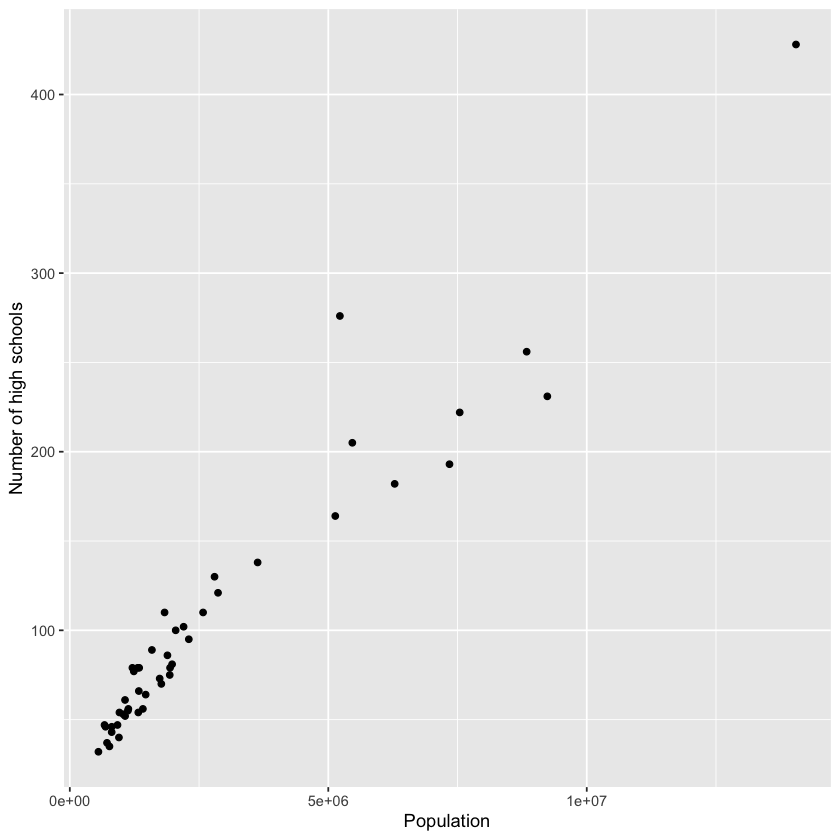

In [5]:
p <- 
  df |> 
  ggplot() +
  aes(`総人口`, `高等学校数`) +
  geom_point() +
  labs(x = "Population", 
       y = "Number of high schools")

p

出力した散布図からどのような関係があると考えられますか？
また、徳島県は散布部のどの位置にありますか？

これらの問いに答えるために、さらに分析を進めてみましょう。


In [6]:
install.packages(c("gghighlight", "ggrepel"))
library(ggrepel)
library(gghighlight)


The downloaded binary packages are in
	/var/folders/bz/w2gy6fh13x7_7y6xlympr0xc0000gn/T//Rtmp47JOVj/downloaded_packages


Warning message:
“ggrepel: 30 unlabeled data points (too many overlaps). Consider increasing max.overlaps”


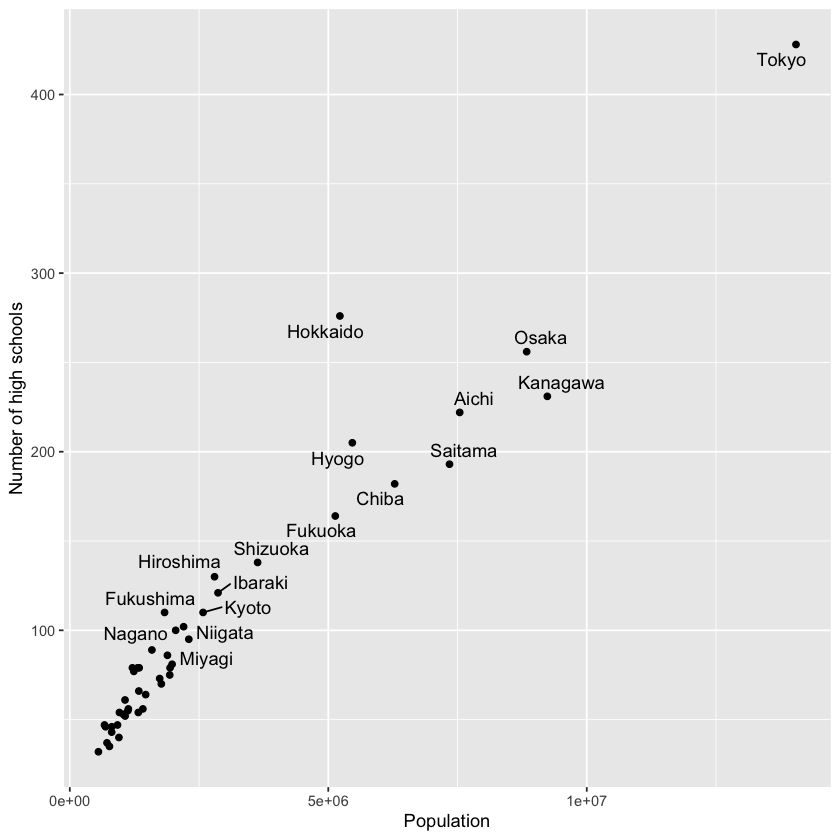

In [7]:
p2 <- 
  p +
  geom_text_repel(aes(label = `都道府県`))

p2

In [8]:
p3 <- 
  p2 +
  scale_x_log10() +
  scale_y_log10()

Warning message:
“ggrepel: 2 unlabeled data points (too many overlaps). Consider increasing max.overlaps”


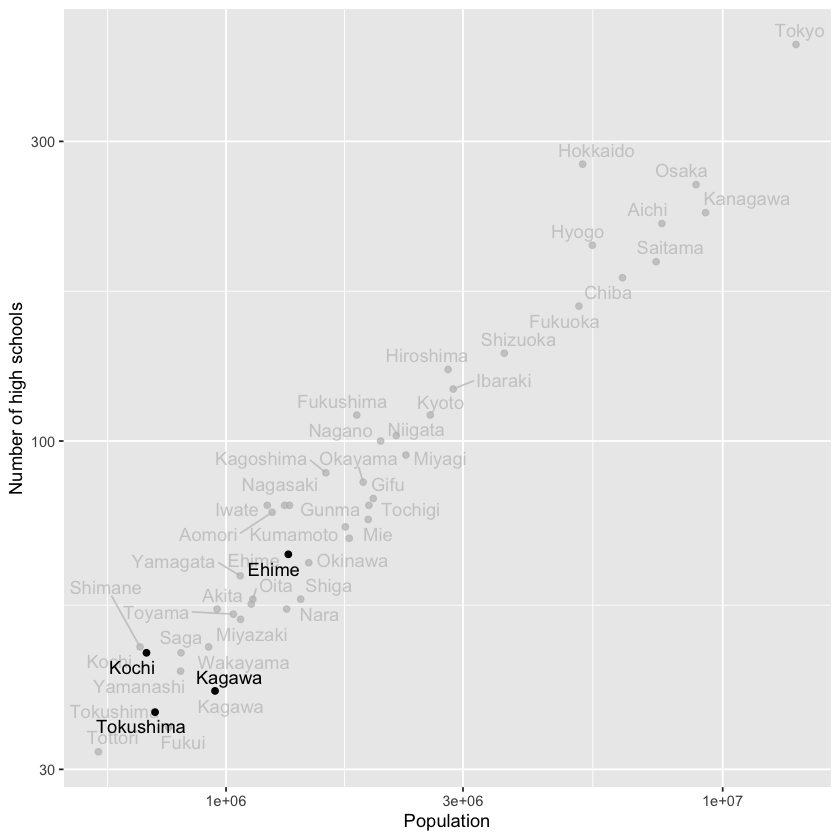

In [9]:
p3 +
  gghighlight(`都道府県` %in% c("Tokushima", "Kagawa", "Kochi", "Ehime"))

### 相関分析

総人口と高等学校数の関係を相関分析を用いて調べてみましょう。
相関係数は2つの変数の間にどのような関係があるかを示す指標です。
1から-1までの値をとり、1に近いほど正の相関があることを示し、-1に近いほど負の相関があることを示します。


In [10]:
cor(df$`総人口`, df$`高等学校数`)

[1] 0.9617191

得られた相関係数から、総人口と高等学校数の間にはどのような関係があると考えられますか？

## 高齢化率

### データの加工

ここでは「高齢化率」の定義を次のようにします。

$$
\text{高齢化率} = \frac{\text{65歳以上の人口}}{\text{総人口}} \times 100
$$

In [11]:
df <- 
  df |> 
  mutate(`高齢化率` = `65歳以上人口` / `総人口` * 100,
         .after = `総人口`)

散布図により、総人口と高齢化率の関係を可視化してみます。


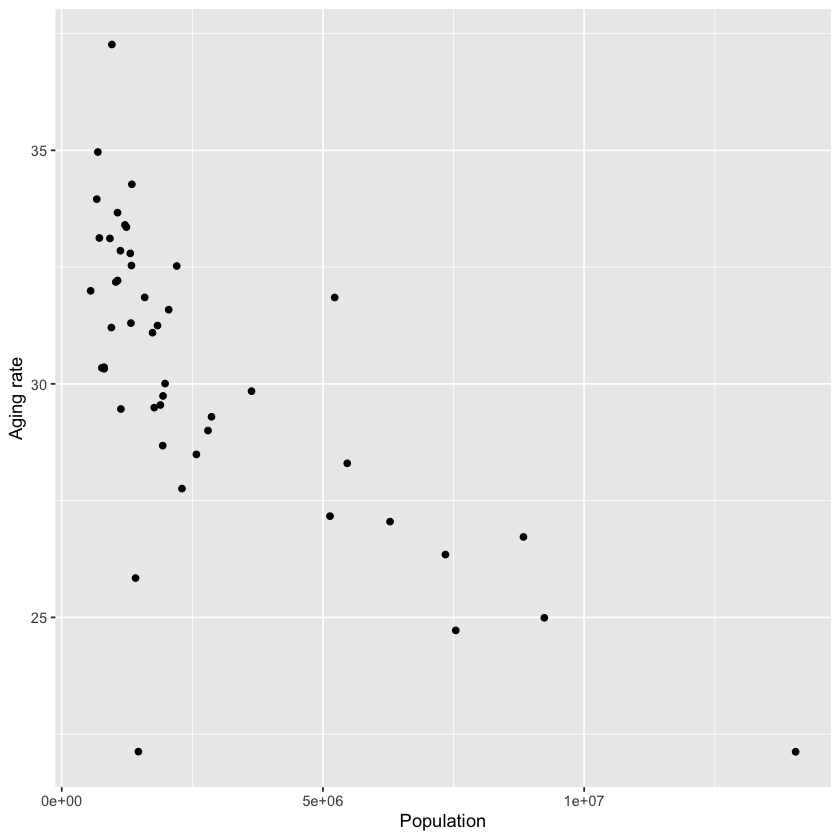

In [12]:
p <- 
  df |> 
  ggplot() +
  aes(`総人口`, `高齢化率`) +
  geom_point() +
  labs(x = "Population", 
       y = "Aging rate")

p

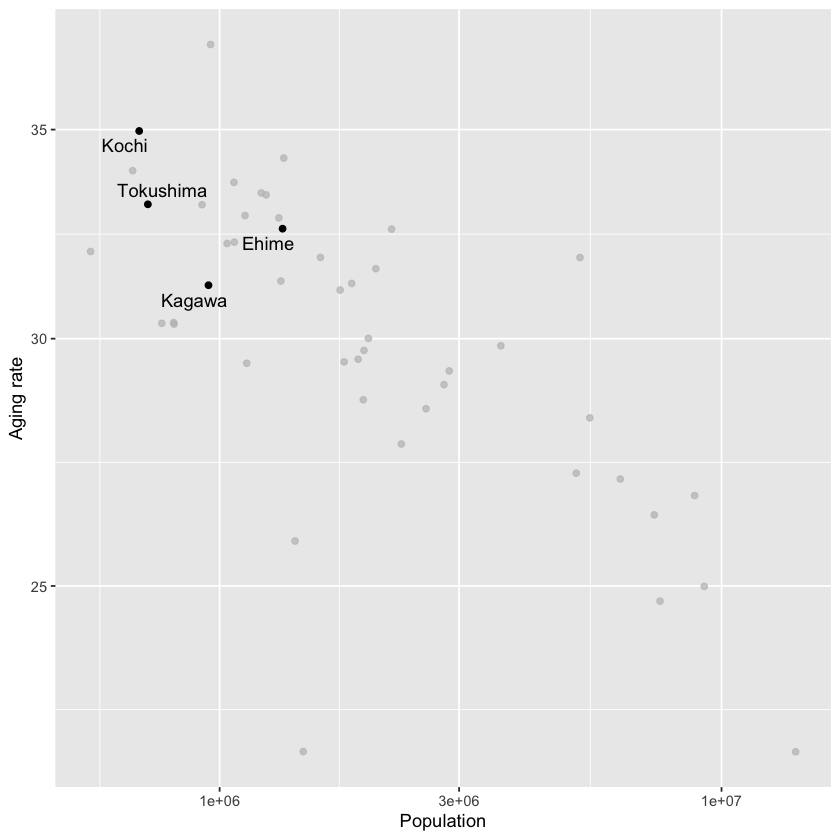

In [13]:
p +
  scale_x_log10() +
  scale_y_log10() +
  gghighlight(`都道府県` %in% c("Tokushima", "Kagawa", "Kochi", "Ehime")) +
  geom_text_repel(aes(label = `都道府県`))

### 回帰分析

回帰分析は、変数の間にどのような関係があるかを調べるために用いられる手法です。総人口と高等学校数の関係を回帰分析を用いて調べてみましょう。


In [14]:
cor(df |> 
      select(!c(`都道府県`))) |> 
  as.data.frame() |>  
  tibble::rownames_to_column("項目") |> 
  tibble::as_tibble() |> 
  select(`項目`, `高齢化率`) |> 
  arrange(`高齢化率`)

項目,高齢化率
<chr>,<dbl>
出生数,-0.71789048
15歳未満人口,-0.71769779
着工建築物床面積,-0.70991809
幼稚園数,-0.69887814
離婚件数,-0.69886111
婚姻件数,-0.69253742
15〜64歳人口,-0.69180420
総人口,-0.68782335
着工建築物数,-0.68576460


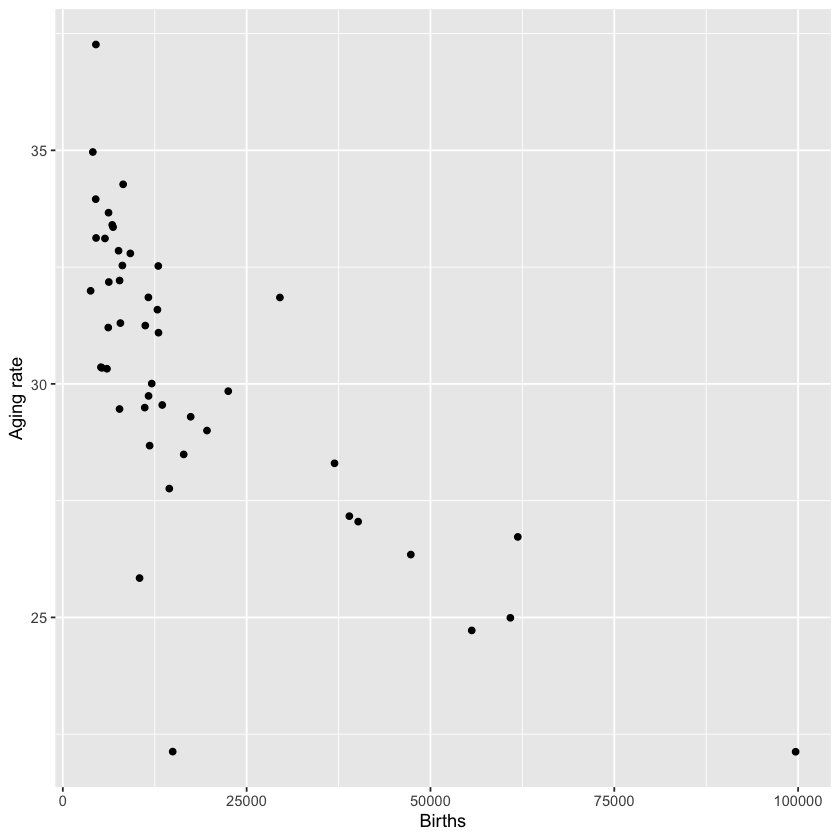

In [15]:
p <- 
  df |> 
  ggplot() +
  aes(`出生数`, `高齢化率`) +
  geom_point() +
  labs(x = "Births", 
       y = "Aging rate")
p

`geom_smooth()` using formula = 'y ~ x'


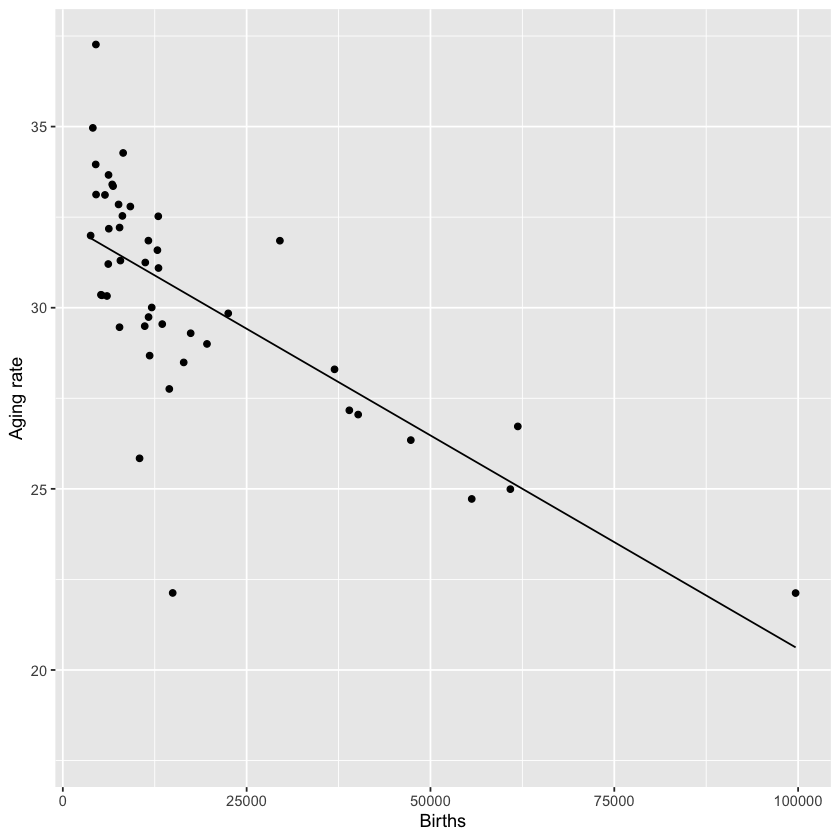

In [16]:
p2 <- 
  p + 
  geom_line(stat = "smooth", method = "lm")
p2

`geom_smooth()` using formula = 'y ~ x'


Warning message:
“ggrepel: 14 unlabeled data points (too many overlaps). Consider increasing max.overlaps”


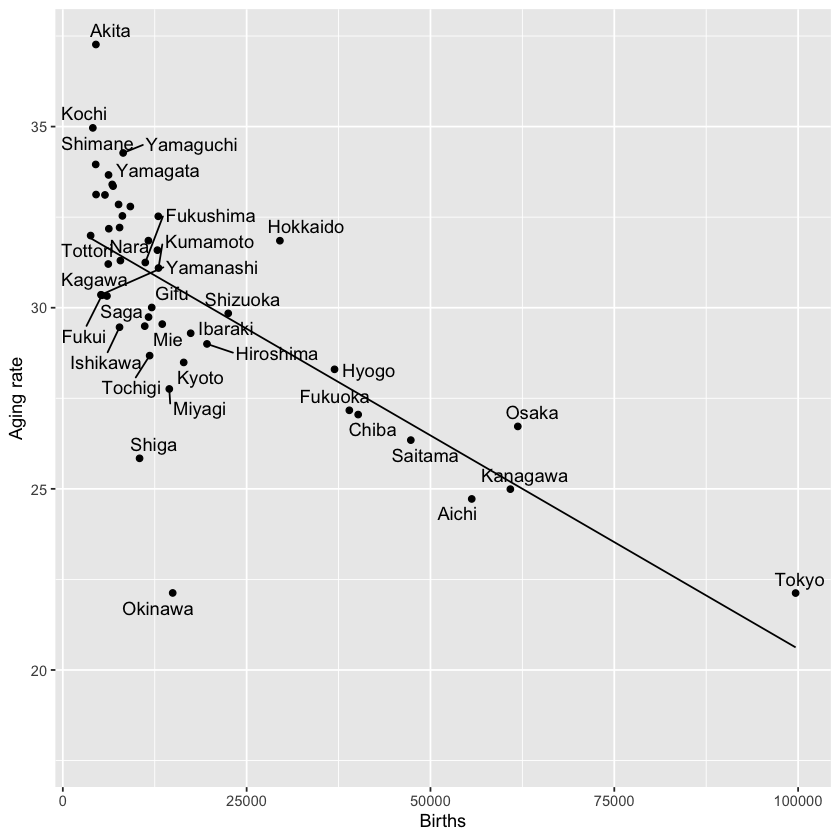

In [17]:
p3 <- 
  p2 +
  geom_text_repel(aes(label = `都道府県`))
p3

In [18]:
lm_res <- 
  lm(`高齢化率` ~ `出生数`, data = df)
summary(lm_res)


Call:
lm(formula = 高齢化率 ~ 出生数, data = df)

Residuals:
    Min      1Q  Median      3Q     Max 
-8.4772 -1.1577  0.1295  1.4618  5.4316 

Coefficients:
              Estimate Std. Error t value Pr(>|t|)    
(Intercept)  3.236e+01  4.481e-01  72.225  < 2e-16 ***
出生数      -1.178e-04  1.703e-05  -6.918 1.35e-08 ***
---
Signif. codes:  0 ‘***’ 0.001 ‘**’ 0.01 ‘*’ 0.05 ‘.’ 0.1 ‘ ’ 1

Residual standard error: 2.253 on 45 degrees of freedom
Multiple R-squared:  0.5154,	Adjusted R-squared:  0.5046 
F-statistic: 47.85 on 1 and 45 DF,  p-value: 1.35e-08


In [19]:
predict(lm_res)

1        2        3        4        5        6        7        8 
28.88656 31.55901 31.57303 30.65865 31.83443 31.63204 31.04327 30.31596 
       9       10       11       12       13       14       15       16 
30.97341 30.99085 26.78910 27.63256 20.62418 25.19442 30.83523 31.62745 
      17       18       19       20       21       22       23       24 
31.45593 31.73854 31.75373 30.84902 30.93996 29.71423 25.81311 31.05199 
      25       26       27       28       29       30       31       32 
31.13492 30.42776 25.07508 28.01129 31.44191 31.68918 31.91877 31.83749 
      33       34       35       36       37       38       39       40 
30.77162 30.05480 31.39809 31.83184 31.63652 31.40999 31.88355 27.77416 
      41       42       43       44       45       46       47 
31.65714 31.28276 30.83170 31.47124 31.45499 30.99344 30.60411

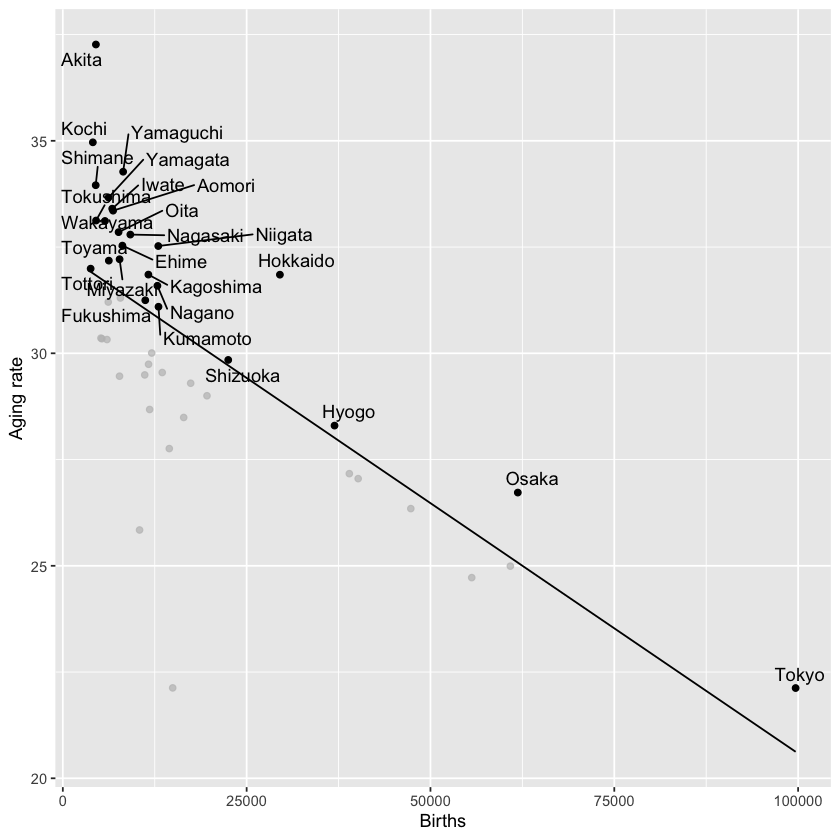

In [20]:
df |> 
  select(`都道府県`, `出生数`, `高齢化率`) |> 
  mutate(fitted_value = predict(lm_res),
         residual = `高齢化率` - fitted_value) |> 
  ggplot() +
  aes(`出生数`, `高齢化率`) +
  geom_point() +
  geom_line(aes(y = fitted_value)) +
  labs(x = "Births", 
       y = "Aging rate") +
  gghighlight(residual > 0) +
  geom_text_repel(aes(label = `都道府県`), 
                  max.overlaps = Inf)